In [1]:
# packages
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import time
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

C:\Users\lucas\AppData\Local\Temp\ipykernel_25376\2663395129.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# import du csv
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203,1,0,155,1,3.1,0,0,3,0
2,70.0,1,0,NaN,174,0,1,125,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1,1,140.0,221,0,1,164,1,0.0,2,0,2,1
1021,60.0,1,0,125.0,258,0,0,141,1,2.8,1,1,3,0
1022,47.0,1,0,110.0,275,0,0,118,1,1.0,1,1,2,0
1023,50.0,0,0,110.0,254,0,0,159,0,0.0,2,0,2,1


In [4]:
stat_analysis = ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

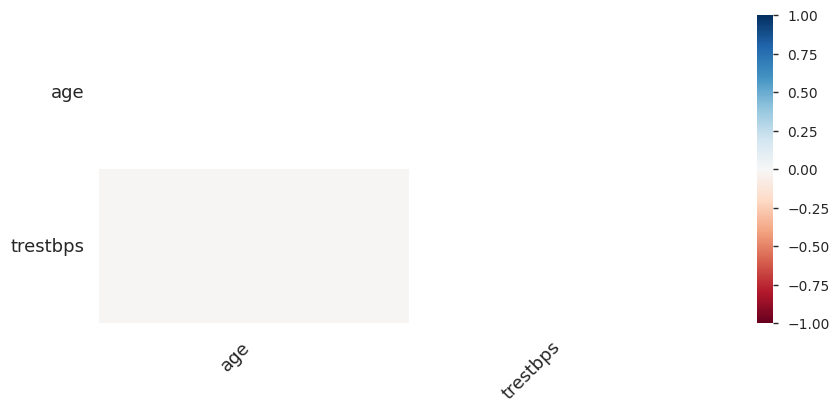

In [5]:
stat_analysis

In [6]:
# Count des valeurs
data['TARGET_5Yrs'].value_counts()

KeyError: 'TARGET_5Yrs'

In [7]:
# Suppression des NaaN
data.dropna(inplace=True)



In [8]:
data['TARGET_5Yrs'].value_counts()

KeyError: 'TARGET_5Yrs'

In [11]:
data['sex'] = data['sex'].replace({1: 'M', 0: 'F'})

In [ ]:
# Suppresion des colonnes inutiles
data.drop(labels=['Name'], axis=1, inplace=True)

In [12]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,M,0,125.0,212,0,1,168,0,1.0,2,2,3,0
1,53.0,M,0,140.0,203,1,0,155,1,3.1,0,0,3,0
3,61.0,M,0,148.0,203,0,1,161,0,0.0,2,1,3,0
4,62.0,F,0,138.0,294,1,1,106,0,1.9,1,3,2,0
5,58.0,F,0,100.0,248,0,0,122,0,1.0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,M,1,140.0,221,0,1,164,1,0.0,2,0,2,1
1021,60.0,M,0,125.0,258,0,0,141,1,2.8,1,1,3,0
1022,47.0,M,0,110.0,275,0,0,118,1,1.0,1,1,2,0
1023,50.0,F,0,110.0,254,0,0,159,0,0.0,2,0,2,1


### Decision tree

In [10]:
# Définition du modèles
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

# Split test/train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=50)

# Appel de l'abre de décision
clf = DecisionTreeClassifier()

# Ajustement des doonées
clf = clf.fit(X_train, Y_train)


# Estimation du test
estimate = clf.predict_proba(X_test)[:,1]




true = Y_test
# build AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate)
auc_ = auc(fpr, tpr)

print(abs(estimate - true).mean())
print(abs(estimate - true).std())


KeyError: 'TARGET_5Yrs'

In [ ]:
print(auc_)

0.6065379535389636


L'AUC est proche de 0.5, il est peu informatif.

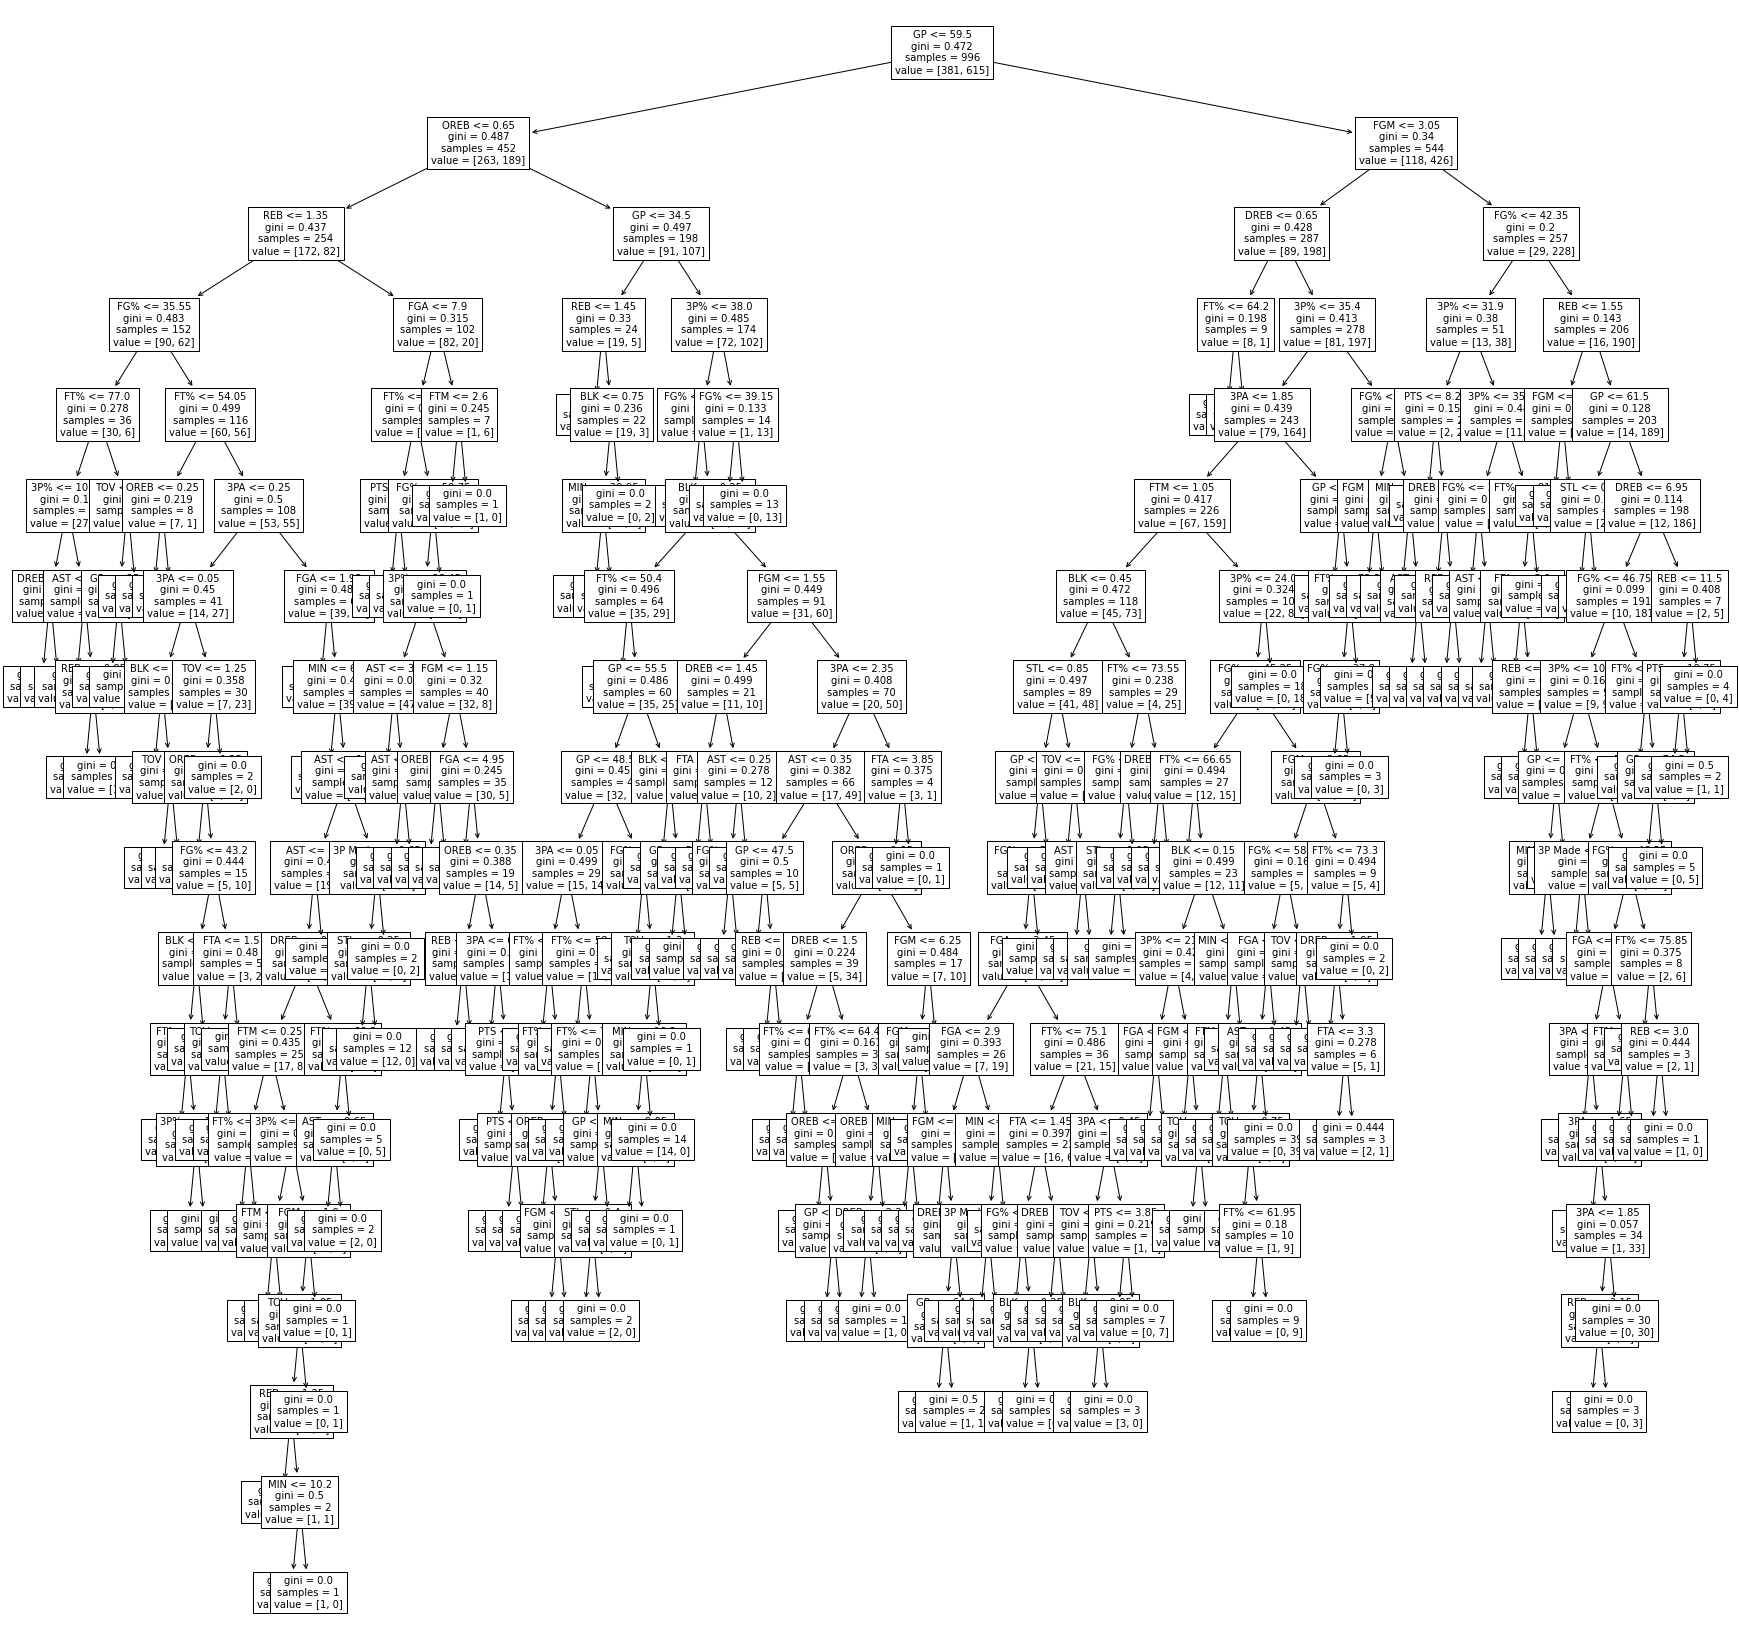

In [ ]:
plt.figure(figsize=(30,30))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

[Text(0.5390732167352538, 0.9705882352941176, 'x[0] <= 59.5\ngini = 0.471\nsamples = 996\nvalue = [378, 618]'),
 Text(0.30795610425240055, 0.9117647058823529, 'x[12] <= 0.65\ngini = 0.487\nsamples = 445\nvalue = [259, 186]'),
 Text(0.19478737997256515, 0.8529411764705882, 'x[11] <= 75.05\ngini = 0.437\nsamples = 257\nvalue = [174, 83]'),
 Text(0.14883401920438957, 0.7941176470588235, 'x[8] <= 36.3\ngini = 0.366\nsamples = 162\nvalue = [123, 39]'),
 Text(0.12208504801097393, 0.7352941176470589, 'x[8] <= 32.0\ngini = 0.394\nsamples = 141\nvalue = [103, 38]'),
 Text(0.09602194787379972, 0.6764705882352942, 'x[14] <= 1.35\ngini = 0.351\nsamples = 119\nvalue = [92, 27]'),
 Text(0.07133058984910837, 0.6176470588235294, 'x[14] <= 1.25\ngini = 0.433\nsamples = 79\nvalue = [54, 25]'),
 Text(0.04938271604938271, 0.5588235294117647, 'x[5] <= 37.25\ngini = 0.389\nsamples = 72\nvalue = [53, 19]'),
 Text(0.02194787379972565, 0.5, 'x[8] <= 8.7\ngini = 0.185\nsamples = 29\nvalue = [26, 3]'),
 Text(0.0

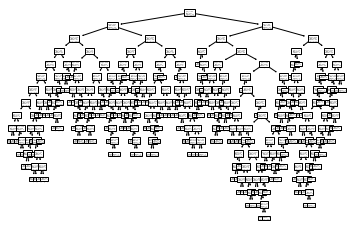

In [ ]:
plot_tree(clf)

In [ ]:
# creating features importance serie
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

GP         0.243331
FT%        0.099350
FG%        0.098297
OREB       0.076961
MIN        0.068608
AST        0.055508
3P%        0.048562
REB        0.047020
FGA        0.042745
DREB       0.040618
3PA        0.033938
TOV        0.033244
BLK        0.030620
3P Made    0.021400
FGM        0.014688
STL        0.014236
FTM        0.012168
FTA        0.011708
PTS        0.006998
dtype: float64

In [ ]:
# Hyperparameters space
param_space = {'criterion':[ 'entropy', 'gini'], 
               'max_depth': list(range(2,10,1)),
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07],
               'random_state': [20]}

# calling classifier
clf_grid = DecisionTreeClassifier()

# running search
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=15)
# running search
grid_search_tree.fit(X, Y.values)

# Meilleur modèle
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 0.01, 'random_state': 42}
best auc: 0.7142085484331472


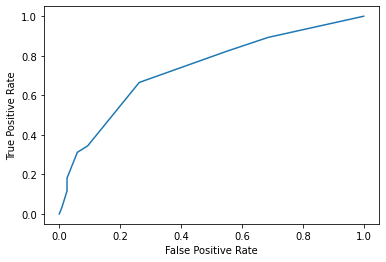

In [ ]:
# Appel de la classification
clf_best = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, min_samples_split = 0.07, random_state= 25)

# Définition des variable
Y = data['TARGET_5Yrs']
X = data.drop(labels=['TARGET_5Yrs'], axis=1)

# splitting into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=42)

# running search
clf_best.fit(X_train, Y_train)

# prediction
estimate_best = clf_best.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test,  estimate_best)
# Roc Curve

plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# auc
print(auc(fpr,tpr))



0.7339771383523848


L’AUC ROC de notre modèle se situe bien au-dessus de celui d’un modèle non-informatif et en-dessous de celui d’un modèle parfait. Avec 73% d’AUC ROC, il s’agit d’un modèle assez performant.

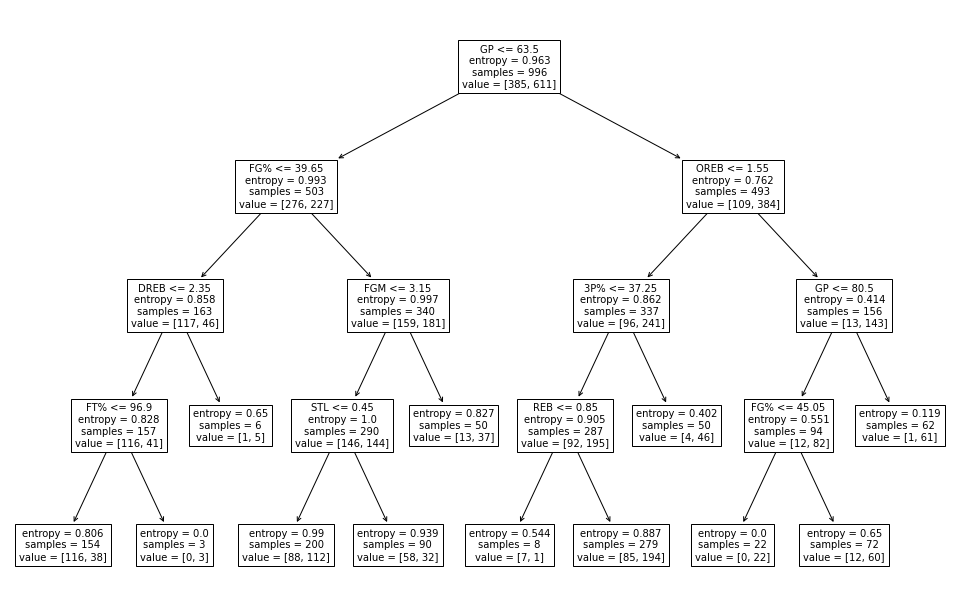

In [ ]:
# plotting tree
plt.figure(figsize=(17,11))
plot_tree(clf_best, feature_names = list(X_train.columns), fontsize=10)
plt.show()

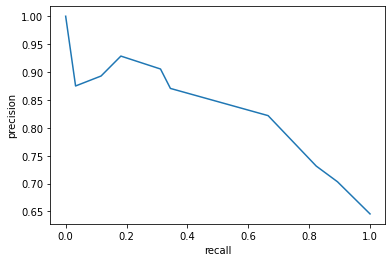

In [ ]:
precision, recall, _ = precision_recall_curve(Y_test,  estimate_best)

# getting pr curve

plt.plot(recall, precision)

plt.ylabel('precision')
plt.xlabel('recall')
plt.show()


### Logistic regression

In [ ]:
# calling classifier
clf_lr = LogisticRegression(solver='liblinear')

# fitting on data
clf_lr = clf_lr.fit(X_train, Y_train)
# estimating on test
estimate_lr = clf_lr.predict_proba(X_test)[:,1]
true = Y_test
# building AUC
fpr, tpr, _ = roc_curve(Y_test,  estimate_lr)
auc_lr = auc(fpr, tpr)

print(auc_lr) 

0.7866771777690186


In [ ]:
rs = range(1000)
auc_list_lr = []
for random_state in rs:
    # model variables definitions
    Y = data['TARGET_5Yrs']
    X = data.drop(labels=['TARGET_5Yrs'], axis=1)

    # splitting into train test
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=random_state)

    # calling decisiontree classifier
    clf_lr = LogisticRegression(solver='liblinear')
    #criterion= 'entropy', max_depth=max_depth, min_samples_split=0.1
    # fitting on data
    clf_lr = clf_lr.fit(X_train, Y_train)
    # estimating on test
    estimate_lr = clf_lr.predict_proba(X_test)[:,1]
    # AUC
    fpr, tpr, _ = roc_curve(Y_test,  estimate_lr)
    auc_lr = auc(fpr, tpr)
    auc_list_lr.append(auc_lr)

print(np.mean(auc_list_lr))

0.7539855119685317


### Cross Validation

In [ ]:
auc_list = []
rs = range(1000)
for random_state in rs: 

    # splitting into train test
    X_train1, X_valid, Y_train1, Y_valid = train_test_split(X_train, Y_train, test_size = 0.20, random_state=random_state)
    # calling decisiontree classifier
    clf_cv = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_split=0.02)
    # fitting on data
    clf_cv = clf_cv.fit(X_train1, Y_train1)
    # estimating on test
    estimate_cv = clf_cv.predict_proba(X_valid)[:,1]

    
    #  AUC
    fpr_cv, tpr_cv, _ = roc_curve(Y_valid,  estimate_cv)
    auc_cv = auc(fpr_cv, tpr_cv)
    auc_list.append(auc_cv)

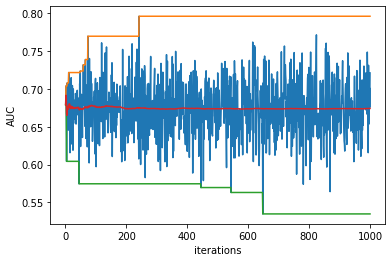

In [ ]:
# convergence de la CrossValidation
iterations = range(1,len(rs)+1)
cum_max_list = [max(auc_list[:i+1]) for i in range(len(auc_list))]
cum_min_list = [min(auc_list[:i+1]) for i in range(len(auc_list))]
cum_mean_list = [np.mean(auc_list[:i+1]) for i in range(len(auc_list))]

plt.plot(iterations,auc_list)
plt.plot(iterations,cum_max_list)
plt.plot(iterations,cum_min_list)
plt.plot(iterations,cum_mean_list)

plt.ylabel('AUC')
plt.xlabel('iterations')
plt.show()